In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-rateupto-2020/Unemployment_Rate_upto_11_2020.csv


# **Exploratory Data Analysis**

In [2]:
# import all the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/unemployment-rateupto-2020/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [5]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
df.shape

(267, 9)

In [7]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [8]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [10]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [12]:
#Trim all column names
df.columns = df.columns.str.strip()

In [13]:
# Deriving Year and Month from date

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Coerce will convert invalid dates to NaT

# Extract Year and Full Month Name
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')

In [15]:
df['Year'].unique()

array([2020], dtype=int32)

In [16]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October'], dtype=object)

In [17]:
# Estimated Unemployment Rate% by region
df_grouped = df.groupby('Region')['Estimated Unemployment Rate (%)'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)  # Sort in descending order
print(df_sorted)

              Region  Estimated Unemployment Rate (%)
7            Haryana                           274.77
23           Tripura                           250.55
10         Jharkhand                           195.39
2              Bihar                           194.71
4              Delhi                           184.14
17        Puducherry                           179.42
8   Himachal Pradesh                           160.65
19         Rajasthan                           158.68
9    Jammu & Kashmir                           148.30
21        Tamil Nadu                           121.87
5                Goa                           121.67
18            Punjab                           119.81
25       Uttarakhand                           111.56
26       West Bengal                           101.92
24     Uttar Pradesh                            97.37
12            Kerala                            94.34
0     Andhra Pradesh                            86.64
14       Maharashtra        

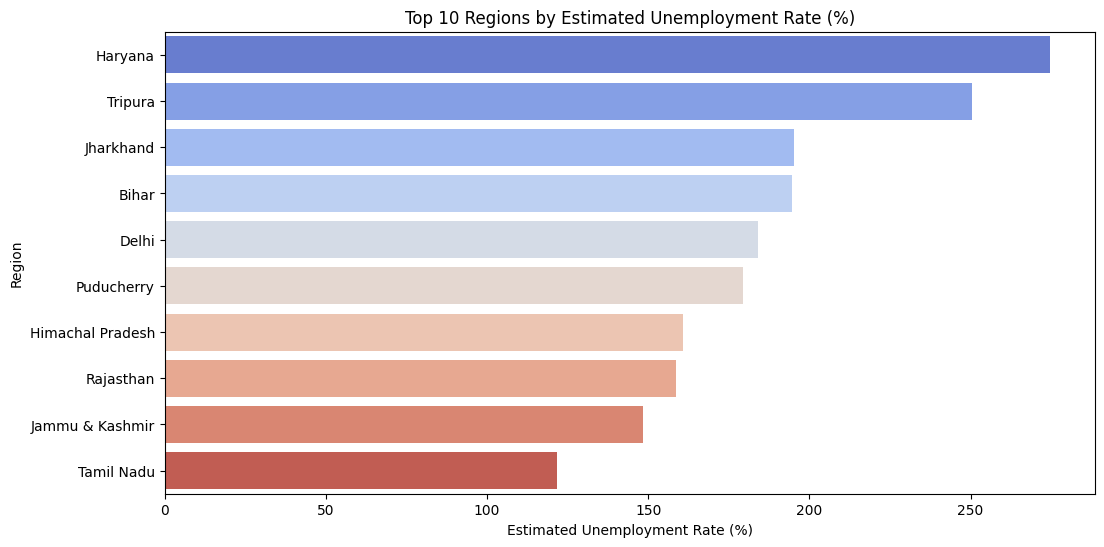

In [18]:
# Top 10 Regions by Estimated Unemployment Rate (%)

df_grouped = df.groupby('Region')['Estimated Unemployment Rate (%)'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)

top_10 = df_sorted.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=top_10, palette='coolwarm')

# Add labels and title
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Region')
plt.title('Top 10 Regions by Estimated Unemployment Rate (%)')
plt.show()


In [19]:
# Monthly Unemployment Rate%
# Estimated Unemployment Rate% by Month
df_grouped = df.groupby('Month')['Estimated Unemployment Rate (%)'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)  # Sort in descending order
print(df_sorted)

       Month  Estimated Unemployment Rate (%)
7        May                           627.60
0      April                           578.14
5       June                           294.60
6      March                           291.13
1     August                           278.46
4       July                           265.53
2   February                           240.92
3    January                           239.11
9  September                           235.06
8    October                           216.71


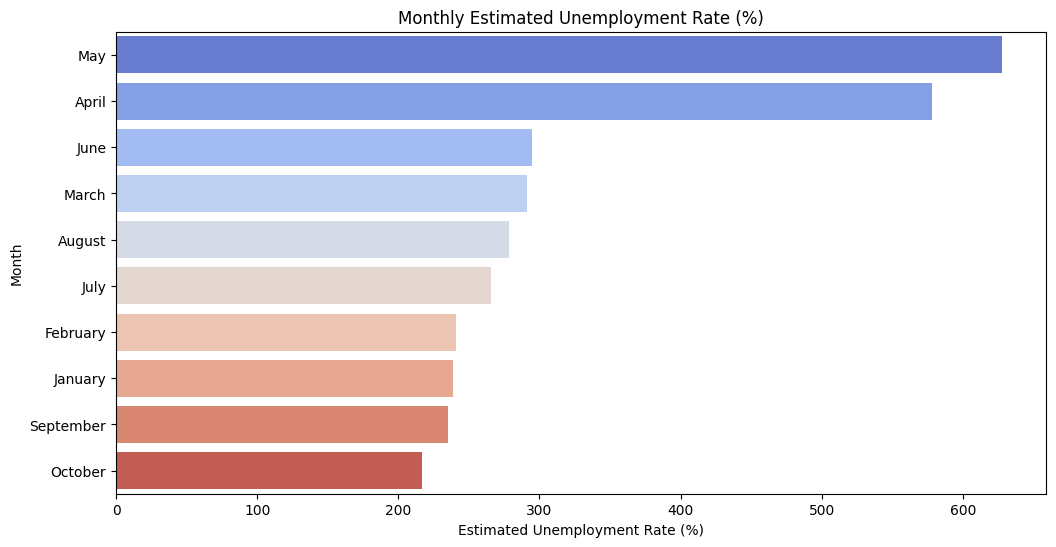

In [20]:
# Monthly Estimated Unemployment Rate (%)

df_grouped = df.groupby('Month')['Estimated Unemployment Rate (%)'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)

top_10 = df_sorted.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Estimated Unemployment Rate (%)', y='Month', data=top_10, palette='coolwarm')

# Add labels and title
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Month')
plt.title('Monthly Estimated Unemployment Rate (%)')
plt.show()


In [22]:
# Regions with the Estimated Employment
df_grouped = df.groupby('Region')['Estimated Employed'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Estimated Employed', ascending=False)
df_sorted

,Region,Estimated Employed
24,Uttar Pradesh,555247990
14,Maharashtra,392047582
26,West Bengal,333051643
2,Bihar,236068280
6,Gujarat,227307461
13,Madhya Pradesh,223183353
21,Tamil Nadu,219878981
11,Karnataka,216240176
19,Rajasthan,197317522
22,Telangana,162440825


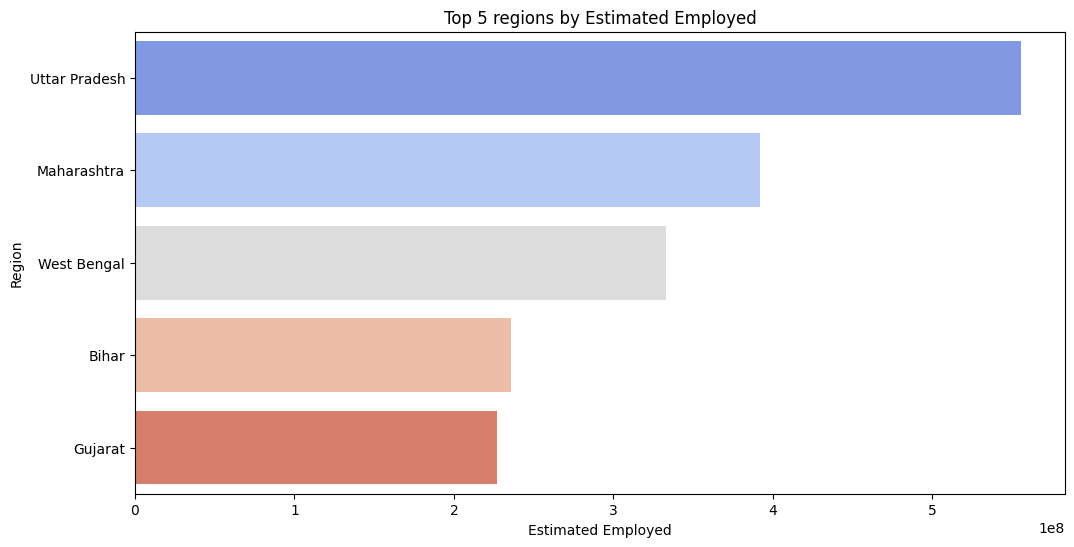

In [23]:
# Top 5 States with the highest Employment

df_grouped = df.groupby('Region')['Estimated Employed'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Estimated Employed', ascending=False)

top_5 = df_sorted.head(5)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Estimated Employed', y='Region', data=top_5, palette='coolwarm')

# Add labels and title
plt.xlabel('Estimated Employed')
plt.ylabel('Region')
plt.title('Top 5 regions by Estimated Employed')
plt.show()

In [24]:
# Months with the Estimated Employment
df_grouped = df.groupby('Month')['Estimated Employed'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Estimated Employed', ascending=False)
df_sorted

,Month,Estimated Employed
3,January,406567194
2,February,402694917
9,September,393871643
8,October,393659474
6,March,392543817
1,August,389584135
4,July,389286580
5,June,374149633
7,May,310699661
0,April,274825174


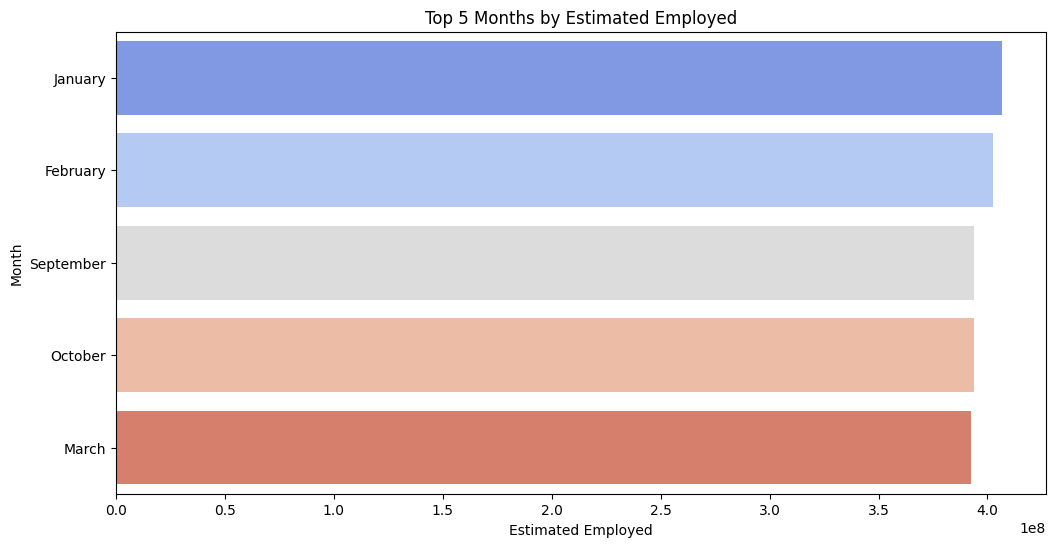

In [25]:
# Top 5 Months with the highest Employment

df_grouped = df.groupby('Month')['Estimated Employed'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Estimated Employed', ascending=False)

top_5 = df_sorted.head(5)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Estimated Employed', y='Month', data=top_5, palette='coolwarm')

# Add labels and title
plt.xlabel('Estimated Employed')
plt.ylabel('Month')
plt.title('Top 5 Months by Estimated Employed')
plt.show()

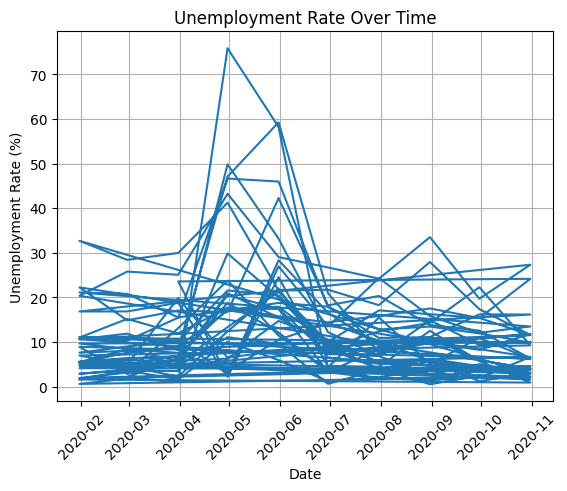

In [26]:
# Plotting the unemployment rate over time
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'])
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [27]:
# Filter the data for the Covid-19 period
df = df[df['Date'] >= '2020-03-01'] 

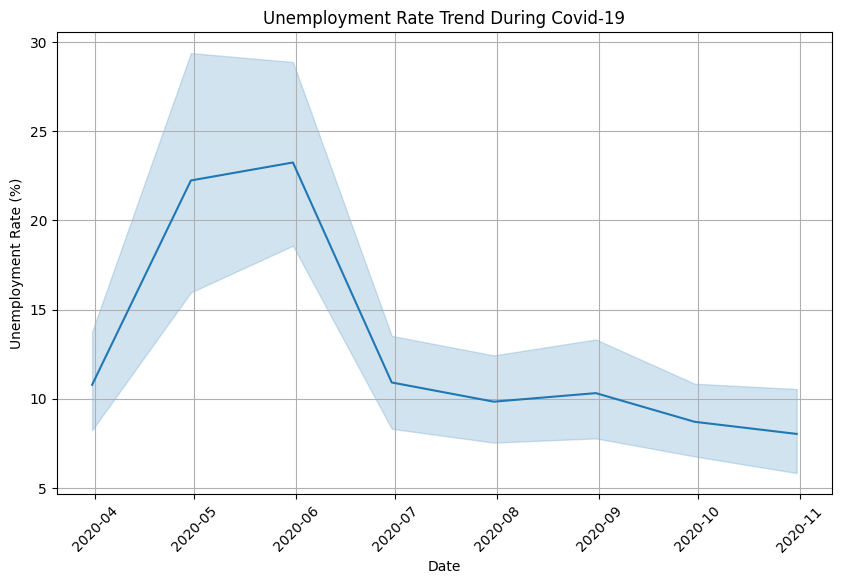

In [28]:
# Visualize the trend of the unemployment rate over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Trend During Covid-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [29]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Year,Month
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,2020,March
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,2020,April
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,2020,May
5,Andhra Pradesh,2020-06-30,M,3.31,19805400,47.41,South,15.9129,79.74,2020,June
6,Andhra Pradesh,2020-07-31,M,8.34,15431615,38.91,South,15.9129,79.74,2020,July


In [30]:
df['Region.1'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [33]:
# Region.1 with the Estimated Unemployment Rate (%)
df_grouped = df.groupby('Region.1')['Estimated Unemployment Rate (%)'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)
df_sorted

,Region.1,Estimated Unemployment Rate (%)
1,North,1021.32
3,South,576.81
0,East,496.40
4,West,351.98
2,Northeast,340.72


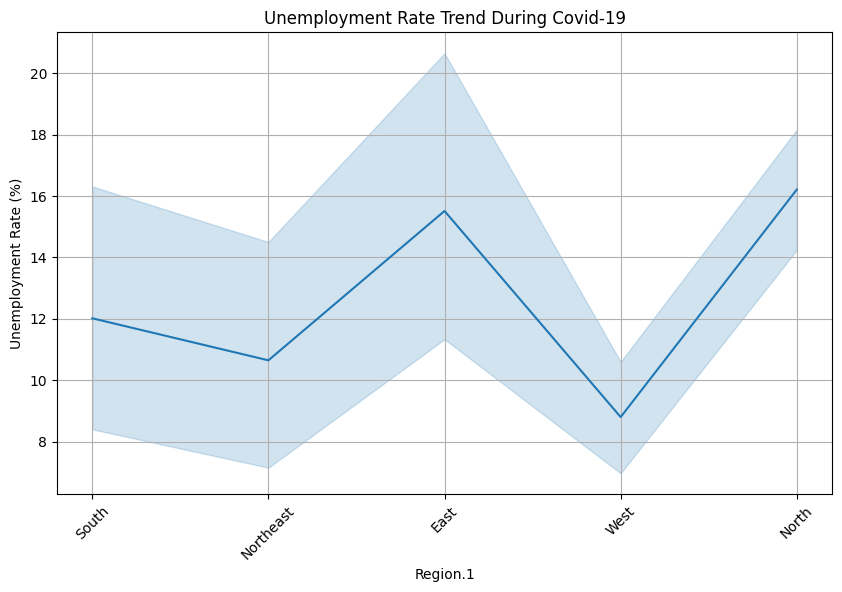

In [34]:
# Visualize the trend of the unemployment rate over Regions
plt.figure(figsize=(10, 6))
sns.lineplot(x='Region.1', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Trend During Covid-19')
plt.xlabel('Region.1')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [36]:
df['Frequency'].unique()

array([' M'], dtype=object)